# Assignment 4-2 Image Processing

In [1]:
import cv2 # workswith images 
from matplotlib import pyplot # for visualisation

import numpy as np

In [2]:
# load your image, 0 is for greyscale mode
img = cv2.imread('Images/Mario1.png')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
# visualisation function with forced grayscale
def myimage(image):
    # image view
    #pyplot.imshow(image)
    pyplot.imshow(img, cmap="gray", vmin=0, vmax=255)# pixel view with grayscale
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

In [4]:
# visualisation function with color
def myimagecolor(image):
    # image view
    pyplot.imshow(image)
    #pyplot.imshow(img, cmap="gray", vmin=0, vmax=255)# pixel view with grayscale
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

image size:  (100, 100, 3)
pixel matrix:
 [[[252 148  92]
  [252 148  92]
  [252 148  92]
  ...
  [252 148  92]
  [252 148  92]
  [252 148  92]]

 [[252 148  92]
  [252 148  92]
  [252 148  92]
  ...
  [252 148  92]
  [252 148  92]
  [252 148  92]]

 [[252 148  92]
  [252 148  92]
  [252 148  92]
  ...
  [252 148  92]
  [252 148  92]
  [252 148  92]]

 ...

 [[ 12  76 200]
  [ 12  76 200]
  [ 12  76 200]
  ...
  [ 12  76 200]
  [ 12  76 200]
  [ 12  76 200]]

 [[ 12  76 200]
  [ 12  76 200]
  [ 12  76 200]
  ...
  [ 12  76 200]
  [ 12  76 200]
  [ 12  76 200]]

 [[ 12  76 200]
  [ 12  76 200]
  [ 12  76 200]
  ...
  [ 12  76 200]
  [ 12  76 200]
  [ 12  76 200]]]


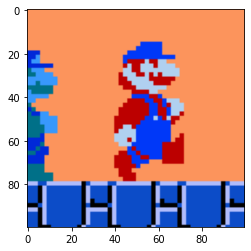

In [5]:
# show the original image
myimage(img)

In [ ]:
# resize the image
SIZE = 32
img = cv2.resize(img, (SIZE,SIZE))

In [ ]:
# show the resized image
myimage(img)

### a)

In [ ]:
cv2.randu(img, 0, 255) # Take the image which is at 32 by 32 pixels and randomize the color values
# This creates the matrix the assignment asks for

In [ ]:
myimage(img)

In [ ]:
myimagecolor(img)

In [ ]:
kernelHorizontal = np.array([[-1, -1, -1],
                           [2, 2, 2],
                           [-1, -1, -1]])

In [ ]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output